<a href="https://colab.research.google.com/github/deepanshudaw/Adversarial-Attacks/blob/master/FGSM_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing uselful libraries

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random

In [0]:
mnist = keras.datasets.mnist

Scaling the data

In [0]:
(train_images, train_label), (test_images, test_label) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

#Multiclass Classification 

```
Model1
```



In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

W0614 07:24:42.205538 139950879098752 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_label, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4750 - acc: 0.8757
Epoch 2/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3038 - acc: 0.9150
Epoch 3/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2834 - acc: 0.9219
Epoch 4/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2737 - acc: 0.9238
Epoch 5/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2668 - acc: 0.9257


In [0]:
test_loss, test_acc = model.evaluate(test_images, test_label)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.2729 - acc: 0.9230
Test accuracy: 0.923


#Weights and biases

In [0]:
model.layers

In [0]:
train_images[9].shape

(28, 28)

In [0]:
summary = model.summary()
layer_weights = model.layers[1].get_weights()


print(summary)
print('HIDDEN-OUTPUT LAYER WEIGHTS:')
print(layer_weights)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None
HIDDEN-OUTPUT LAYER WEIGHTS:
[array([[ 0.04967336,  0.08173346, -0.04541287, ...,  0.07929546,
        -0.02771937,  0.05821223],
       [-0.08408047, -0.02176744, -0.08357406, ..., -0.04434944,
        -0.00836277,  0.03718759],
       [-0.04032581, -0.02126082, -0.00714342, ...,  0.04003149,
         0.03020409, -0.00467454],
       ...,
       [ 0.03274537, -0.04450845,  0.00746471, ..., -0.05885345,
        -0.01015642,  0.05568244],
       [-0.05277876,  0.00600194, -0.05808114, ...,  0.0796478 ,
    

In [0]:
w,b=layer_weights

#Applying FGSM from scratch

In [0]:
dist=test_images[0].reshape(1,784)

In [0]:
w.shape,b.shape,dist.shape

((784, 10), (10,), (1, 784))

In [0]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

6719


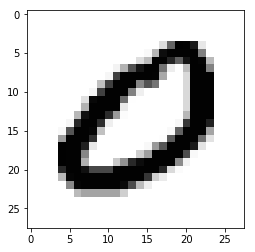

The predicted digit is 0


<function matplotlib.pyplot.show>

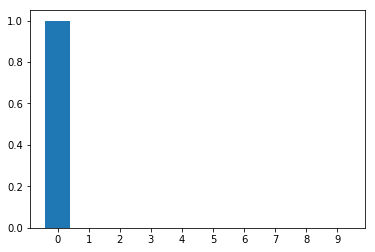

In [0]:
  eps=0.0
  k=random.randint(0,9999) #selects a random test case
  print(k)
  dist=test_images[k].reshape(1,784) #reshapes the random test case's image
  epsilon=np.empty([1,10])
  for i in range(10):
    epsilon[0][i]=eps #assign epsilon to an array
  dist=dist+(np.matmul(epsilon,np.sign(w).transpose())) #the formula i used for distorted image generation
  #model.predict(dist.reshape(1,28,28))
  plt.imshow(dist.reshape(28,28), cmap='Greys')
    #plt.imshow(test_images[0], cmap='Greys')
  plt.show()
  ar=np.empty(10)
  for i in range(10):
    ar[i]=model.predict(dist.reshape(1,28,28))[0][i]
  mx=0
  max_index=0
  for i in range(10):
    mx=max(mx,ar[i])
    if(mx==ar[i]):
      max_index=i
  print("The predicted digit is",max_index)
  index = np.arange(10)
  plt.bar(index,ar,tick_label=index)
  plt.show

In [0]:
k=0
acc=[]
range_eps=[0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.15,0.2]
for eps in range_eps:
  dist_images=np.empty([10000,784])
  for i in range(10000):
    dist_images[i]=np.empty([1,784])
    dist_images[i]=test_images[i].reshape(1,784)
  epsilon=np.empty([1,10])
  for i in range(10):
    epsilon[0][i]=eps #assign epsilon to an array
  dist_images=dist_images+(np.matmul(epsilon,np.sign(w).transpose()))
  acc.insert(k,model.evaluate(dist_images.reshape(10000,28,28),test_label)[1])
  k=k+1

10000/10000 [==============================] - 0s 44us/sample - loss: 28.7025 - acc: 0.1569


Epsilon		Accuracy
0 		 0.923
0.01 		 0.8631
0.02 		 0.7243
0.03 		 0.5965
0.04 		 0.5041
0.05 		 0.4391
0.06 		 0.3849
0.07 		 0.3381
0.08 		 0.3028
0.09 		 0.2774
0.1 		 0.2621
0.15 		 0.2014
0.2 		 0.1569


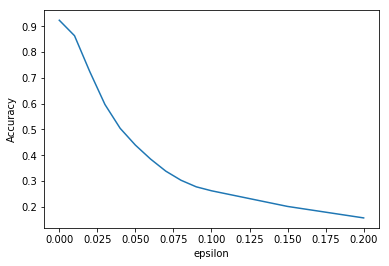

In [0]:
plt.xlabel('epsilon')
plt.ylabel('Accuracy')
plt.plot([0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.15,0.2],acc)
i=0
print("Epsilon\t\tAccuracy")
for eps in range_eps:
  print(eps,'\t\t',acc[i])
  i=i+1

#Coin flip 

In [0]:
epsilon=0.01
for i in range(10000):
  if (2**i>(1/epsilon)):
    k=i-1
    break
print (k)

6


In [0]:

def create_dist(k):
  dist_images=np.empty([10000,28,28])
  ite=0
  for i in range(10000):
    for j in range(28):
      for l in range(28):
        no_of_heads=0
        for b in range(k):
          if random.randint(0,1)==0:
            no_of_heads=no_of_heads+1
        if no_of_heads==k:
          ite=ite+1
          dist_images[i][j][l]=random.randint(0,254)
        else:
          dist_images[i][j][l]=test_images[i][j][l]
  return ite,dist_images

In [0]:
  k=4
  dist_images=np.empty([10000,28,28])
  ite=0
  for i in range(10000):
    for j in range(28):
      for l in range(28):
        no_of_heads=0
        for b in range(k):
          if random.randint(0,1)==0:
            no_of_heads=no_of_heads+1
        if no_of_heads==k:
          ite=ite+1
          dist_images[i][j][l]=random.randint(0,254)
        else:
          dist_images[i][j][l]=test_images[i][j][l]

In [0]:
it=0
dis_images=np.empty([10000,28,28])
it,dis_images=create_dist(8)

(6.247270408163265, <matplotlib.image.AxesImage at 0x7f4888090ac8>)

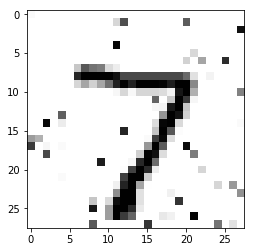

In [0]:
ite/(28*28*100),plt.imshow(dist_images[0],cmap='Greys')

In [0]:
for k in range(1,5):
  print(k)
  dist_images=np.empty([10000,28,28])
  ite=0
  for i in range(10000):
    for j in range(28):
      for l in range(28):
        no_of_heads=0
        for b in range(k):
          if random.randint(0,1)==0:
            no_of_heads=no_of_heads+1
        if no_of_heads==k:
          ite=ite+1
          dist_images[i][j][l]=random.randint(0,254)
        else:
          dist_images[i][j][l]=test_images[i][j][l]
  print("Model Accuracy  : ",model.evaluate(dist_images/255, test_label)[1])
  print("Distortion done : ",ite/(28*28*100)," %")
  print("________________________________________________")
print("Model Accuracy  : ",model.evaluate(test_images/255, test_label)[1])
print("Distortion done :  0 %")
print("________________________________________________")

1
10000/10000 [==============================] - 0s 44us/sample - loss: 8.0369 - acc: 0.2253
Model Accuracy  :  0.2253
Distortion done :  49.986875  %
________________________________________________
2
10000/10000 [==============================] - 0s 42us/sample - loss: 2.7535 - acc: 0.4167
Model Accuracy  :  0.4167
Distortion done :  25.000854591836735  %
________________________________________________
3
10000/10000 [==============================] - 0s 43us/sample - loss: 0.8490 - acc: 0.7172
Model Accuracy  :  0.7172
Distortion done :  12.48876275510204  %
________________________________________________
4
10000/10000 [==============================] - 0s 43us/sample - loss: 0.4140 - acc: 0.8701
Model Accuracy  :  0.8701
Distortion done :  6.260803571428571  %
________________________________________________
10000/10000 [==============================] - 0s 43us/sample - loss: 0.2666 - acc: 0.9263
Model Accuracy  :  0.9263
Distortion done : 0 %
____________________________________